In [66]:
import pandas as pd
import numpy as np 
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

In [50]:
data_1=pd.read_csv('C:\\Users\\sindh\\OneDrive\\Documents\\Analytics Course\\MPS\\ALY6980\\Data\\2022_non-eShop.csv')
data_2=pd.read_csv('C:\\Users\\sindh\\OneDrive\\Documents\\Analytics Course\\MPS\\ALY6980\\Data\\2022_eShop.csv')
data_11=pd.read_csv('C:\\Users\\sindh\\OneDrive\\Documents\\Analytics Course\\MPS\\ALY6980\\Data\\2023_non-eShop.csv')
data_21=pd.read_csv('C:\\Users\\sindh\\OneDrive\\Documents\\Analytics Course\\MPS\\ALY6980\\Data\\2023_eShop.csv')
data_31=pd.read_csv('C:\\Users\\sindh\\OneDrive\\Documents\\Analytics Course\\MPS\\ALY6980\\Data\\2024_non-eShop.csv')
data_32=pd.read_csv('C:\\Users\\sindh\\OneDrive\\Documents\\Analytics Course\\MPS\\ALY6980\\Data\\2024_eShop.csv')


C:\Users\sindh\AppData\Local\Temp\ipykernel_31672\586100656.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2=pd.read_csv('C:\\Users\\sindh\\OneDrive\\Documents\\Analytics Course\\MPS\\ALY6980\\Data\\2022_eShop.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167194 entries, 0 to 3167193
Data columns (total 11 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   order_date                object 
 1   order_number              int64  
 2   material_number           object 
 3   order_material_net_value  float64
 4   sales_channel             object 
 5   PRH1                      object 
 6   PRH4                      object 
 7   customer_group            object 
 8   customer_number           object 
 9   region                    object 
 10  DSO_Ind                   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 265.8+ MB
2022-01-01 00:00:00
2024-04-28 00:00:00
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3167194 entries, 0 to 3167193
Data columns (total 16 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   order_date                datetime64[ns]
 1   order_number        

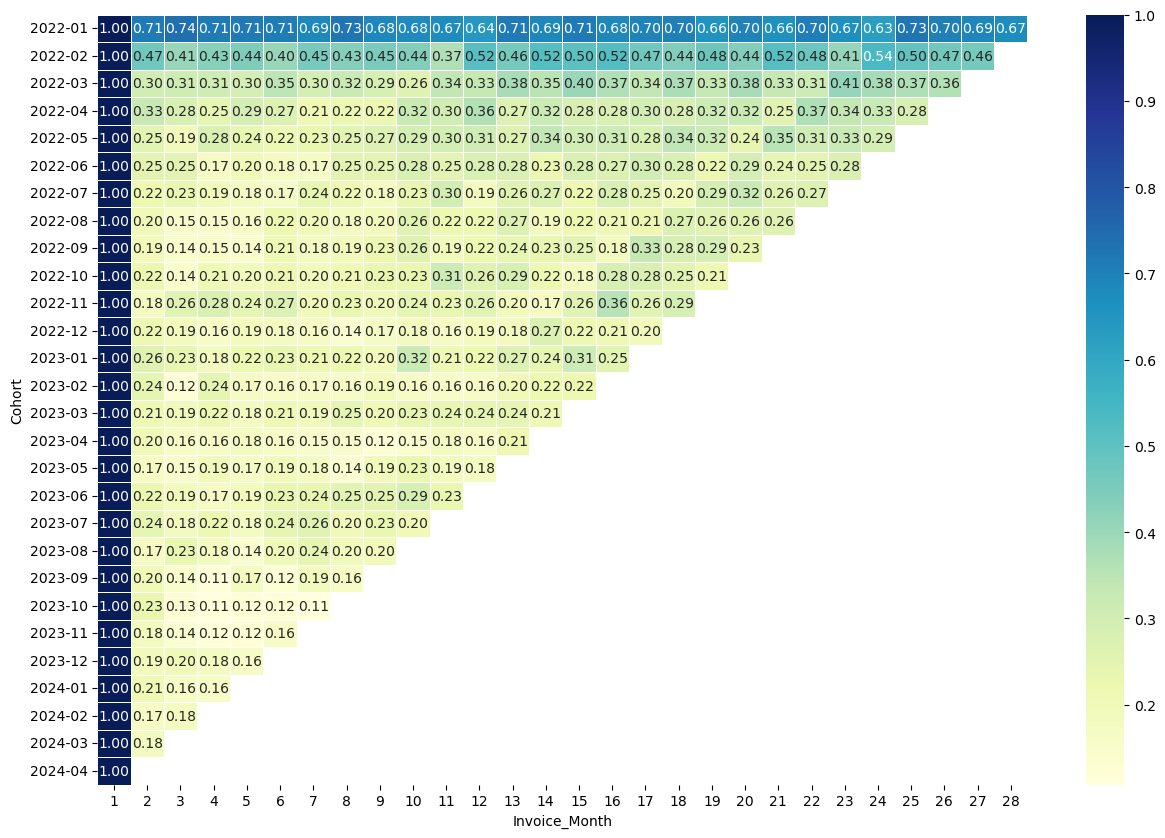

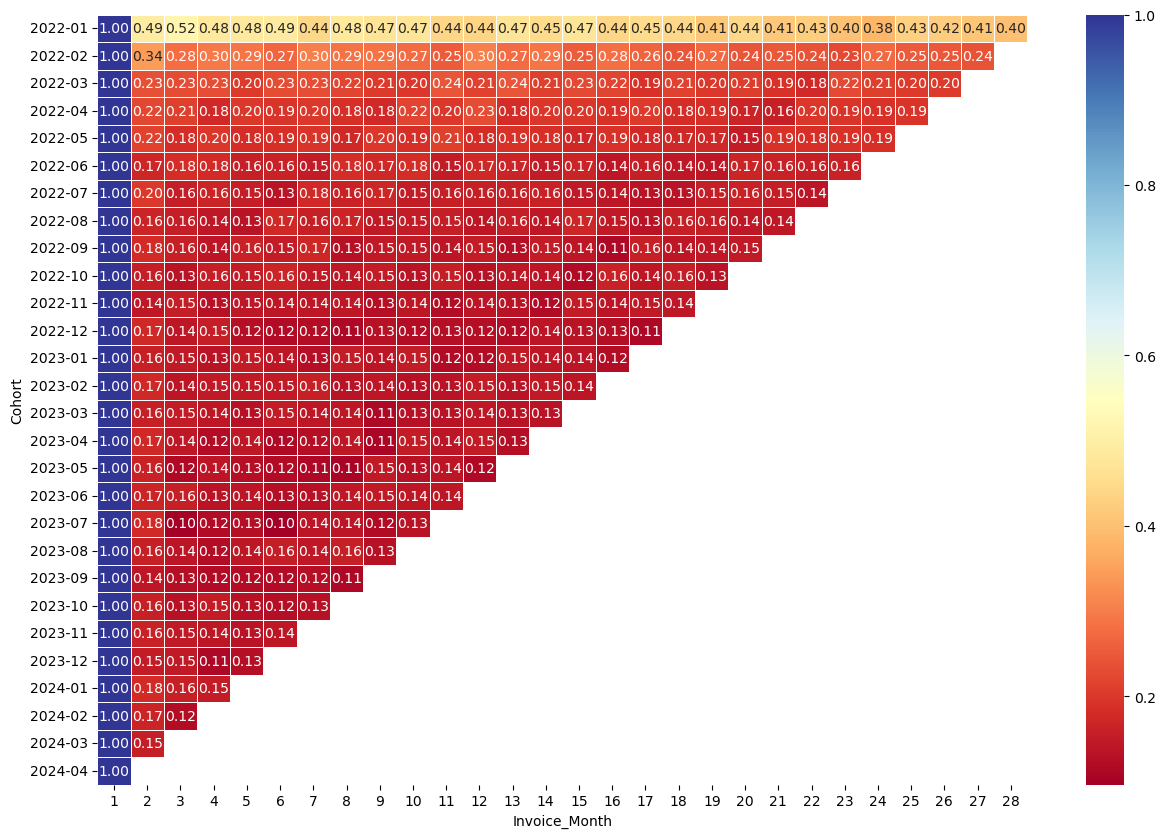

C:\Users\sindh\AppData\Local\Temp\ipykernel_31672\3964737014.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_5.drop('region',axis=1,inplace=True)


order_date                  0
order_number                0
material_number             0
order_material_net_value    0
sales_channel               0
PRH1                        0
PRH4                        0
customer_group              0
customer_number             0
DSO_Ind                     0
Cohort                      0
Invoice_Month               0
dtype: int64

In [51]:
data_3=pd.concat([data_1,data_2,data_11,data_21,data_31,data_32],axis=0,ignore_index=True)
data_3.head()
data_3.info()
data_3.drop_duplicates(inplace=True)
data_3['order_date']=pd.to_datetime(data_3['order_date'])
print(min(data_3['order_date']))
print(max(data_3['order_date']))
df_group=data_3.groupby('customer_number')['order_date'].min().reset_index()

df_group.head()

data_4=pd.merge(data_3,df_group,on='customer_number',how='inner')

data_4.columns=['order_date',
 'order_number',
 'material_number',
 'order_material_net_value',
 'sales_channel',
 'PRH1',
 'PRH4',
 'customer_group',
 'customer_number',
 'region',
 'DSO_Ind',
 'Initial_order_date']

data_4['Cohort_Month']=data_4['Initial_order_date'].dt.month
data_4['Cohort_Year']=data_4['Initial_order_date'].dt.year
data_4['Cohort']=data_4['Initial_order_date'].dt.to_period('M')

data_4['Invoice_Month']=((data_4['order_date'].dt.year)-(data_4['Initial_order_date'].dt.year))*12+((data_4['order_date'].dt.month)-(data_4['Initial_order_date'].dt.month))+1

data_4.head()
data_4.groupby(['Cohort','Invoice_Month'])['customer_number'].count()
data_4.info()
pivot_table_eshop = pd.pivot_table(data_4[data_4['sales_channel']=='eShop'], index='Cohort', columns='Invoice_Month', values='customer_number', aggfunc='nunique')
pivot_table_shop = pd.pivot_table(data_4[data_4['sales_channel']=='non-eShop'], index='Cohort', columns='Invoice_Month', values='customer_number', aggfunc='nunique')
pivot_table_eshop
pivot_table_shop
pivot_table_eshop=pivot_table_eshop.divide(pivot_table_eshop.iloc[:,0],axis=0)
pivot_table_shop=pivot_table_shop.divide(pivot_table_shop.iloc[:,0],axis=0)
pivot_table_eshop.sort_index(inplace=True)
pivot_table_eshop
pivot_table_shop
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
# Customizing the appearance of the heatmap
sns.heatmap(pivot_table_eshop, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)

# Display the plot
plt.show()

plt.figure(figsize=(15, 10))
# Customizing the appearance of the heatmap
sns.heatmap(pivot_table_shop, cmap='RdYlBu', annot=True, fmt='.2f', linewidths=.5)

# Display the plot
plt.show()
data_4.columns.to_list()
data_5=data_4[['order_date',
 'order_number',
 'material_number',
 'order_material_net_value',
 'sales_channel',
 'PRH1',
 'PRH4',
 'customer_group',
 'customer_number',
 'region',
 'DSO_Ind',
 'Cohort',
 'Invoice_Month']]
data_5.head()
data_5.isna().sum()/len(data_5)
data_5.drop('region',axis=1,inplace=True)
data_5=data_5.fillna('N/A')
data_5.isna().sum()


In [52]:
# Select relevant features for clustering
features = ['order_material_net_value', 'PRH1', 'PRH4', 'customer_group', 'DSO_Ind']

In [53]:
print(data_4)
data_4.info()
data_4.isna()

        order_date  order_number material_number  order_material_net_value  \
0       2022-03-29    3020884964         109.945                   1021.06   
1       2022-03-29    3020884964         115.252                   1785.24   
2       2022-07-06    3021977134         115.245                    611.21   
3       2022-10-05    3022953494         108.160                    227.57   
4       2022-08-17    3022394303         115.275                   1133.00   
...            ...           ...             ...                       ...   
3167189 2024-04-17     114075832         046.402                     82.50   
3167190 2024-01-25     113810235        065.0037                     38.00   
3167191 2024-03-03     113930660         046.402                     72.00   
3167192 2024-01-31     113830130        022.4503                    390.00   
3167193 2024-03-14     113969174        025.4201                     62.00   

        sales_channel                   PRH1                   

,order_date,order_number,material_number,order_material_net_value,sales_channel,PRH1,PRH4,customer_group,customer_number,region,DSO_Ind,Initial_order_date,Cohort_Month,Cohort_Year,Cohort,Invoice_Month
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3167189,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3167190,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3167191,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3167192,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [54]:
# Fill missing values
#data_4 = data_4.fillna('N/A')
print(data_4_encoded)

         order_material_net_value  PRH1_Biomaterials  PRH1_Digital Enablers  \
0                         1021.06                  0                      0   
1                         1785.24                  0                      0   
2                          611.21                  0                      0   
3                          227.57                  0                      0   
4                         1133.00                  0                      0   
...                           ...                ...                    ...   
3167189                     82.50                  0                      0   
3167190                     38.00                  0                      0   
3167191                     72.00                  0                      0   
3167192                    390.00                  0                      0   
3167193                     62.00                  0                      0   

         PRH1_Implant Solutions  PRH1_Not assigned 

In [55]:
# Convert categorical features to numerical values
data_4_encoded = pd.get_dummies(data_4[features])

In [56]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_4_encoded)

In [57]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=5) 
data_pca = pca.fit_transform(data_scaled)

In [64]:
# Sample the data if still too large
sample_size = 10000 
if data_pca.shape[0] > sample_size:
    np.random.seed(42)
    sampled_indices = np.random.choice(data_pca.shape[0], sample_size, replace=False)
    data_pca_sampled = data_pca[sampled_indices, :]
else:
    data_pca_sampled = data_pca

In [67]:
# Determine the optimal value of eps using k-distance plot
k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(data_pca_sampled)
distances, indices = neighbors_fit.kneighbors(data_pca_sampled)

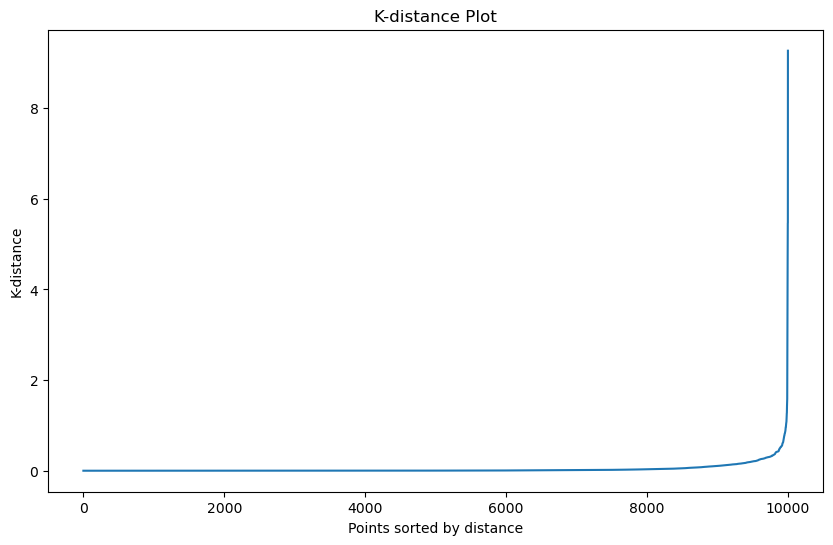

In [68]:
distances = np.sort(distances[:, k-1], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distance Plot')
plt.xlabel('Points sorted by distance')
plt.ylabel('K-distance')
plt.show()

In [71]:
# Choose an optimal eps value based on the k-distance plot
optimal_eps = 0.3  # Adjust this based on the plot



In [72]:
# Apply DBSCAN for clustering on the sampled data
dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
labels = dbscan.fit_predict(data_pca_sampled)

In [73]:
# Assign cluster labels to the original data (for sampled data)
data_4['Cluster'] = -1  # Initialize all as noise
data_4.loc[sampled_indices, 'Cluster'] = labels

In [74]:
# Check the number of clusters and noise points
print("Number of clusters: ", len(set(labels)) - (1 if -1 in labels else 0))
print("Number of noise points: ", list(labels).count(-1))

Number of clusters:  43
Number of noise points:  188


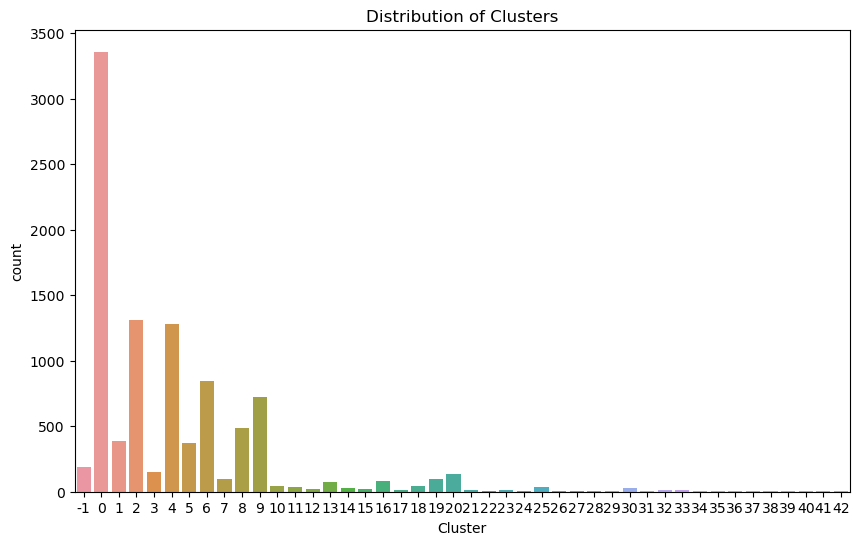

In [75]:
# Plot the distribution of clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=data_4.loc[sampled_indices])
plt.title('Distribution of Clusters')
plt.show()

In [76]:
# Display the first few rows of the clustered data
data_4.head()

,order_date,order_number,material_number,order_material_net_value,sales_channel,PRH1,PRH4,customer_group,customer_number,region,DSO_Ind,Initial_order_date,Cohort_Month,Cohort_Year,Cohort,Invoice_Month,Cluster
0,2022-03-29,3020884964,109.945,1021.06,non-eShop,Implant Solutions,"BLAT Ti Implants, standard",Others,30303430363137323837,NaN,Non-DSO,2022-01-27,1,2022,2022-01,3,-1
1,2022-03-29,3020884964,115.252,1785.24,non-eShop,Restorative Solutions,"Abutments, SRA",Others,30303430363137323837,NaN,Non-DSO,2022-01-27,1,2022,2022-01,3,-1
2,2022-07-06,3021977134,115.245,611.21,non-eShop,Restorative Solutions,"Abutments, SRA",Others,30303430363137323837,NaN,Non-DSO,2022-01-27,1,2022,2022-01,7,-1
3,2022-10-05,3022953494,108.160,227.57,non-eShop,Restorative Solutions,Other Prosthetics,Others,30303430363137323837,NaN,Non-DSO,2022-01-27,1,2022,2022-01,10,-1
4,2022-08-17,3022394303,115.275,1133.00,non-eShop,Restorative Solutions,"Abutments, SRA",Others,30303430363137323837,NaN,Non-DSO,2022-01-27,1,2022,2022-01,8,-1
